# Capstone Project Flask UI

Pada capstone ini anda diminta untuk membangun sebuah Flask UI sederhana yang berisi beberapa tampilan plot dari skeleton yang sudah disediakan dan satu plot tambahan berdasarkan analisis anda.

File ini dapat dimanfaatkan untuk membantu anda dalam proses wrangling dan visualization. Apabila proses wrangling sudah tepat dan hasil visualisasi sudah sesuai dengan ketentuan, anda dapat memindahkan kembali kode program yang sudah anda lengkapi ke dalam file `app.py`.

## Data Preprocessing

**Import library**

In [1]:
#from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

**Load data**

Bacalah file `googleplaystore.csv` data dan simpan ke objek dataframe dengan nama playstore

In [2]:
playstore =  pd.read_csv("data/googleplaystore.csv"  )
playstore =playstore.reset_index() 
playstore.describe() #9367
 

,index,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


**Data Cleansing** 

**_Task 1:_** Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)

In [3]:
#playstore._________(subset = ___________________) 
#hapus data app yang duplikat keep first
#drop_duplicates(self, subset=None, keep="first", inplace=False)
playstore.drop_duplicates(subset =['App'],  keep="first", inplace=True  ) 
playstore.describe() #9367 9660

,index,Rating
count,9660.000000,8197.000000
mean,5666.670393,4.175052
std,3102.587593,0.561026
min,0.000000,1.000000
25%,3111.750000,4.000000
50%,5814.500000,4.300000
75%,8328.250000,4.500000
max,10840.000000,19.000000


Bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar

In [4]:
playstore.drop([10472], inplace=True)

**_Task 2:_** Cek tipe data kolom Category. Jika masih tersimpan dengan format tipe data yang salah, ubah ke tipe data yang sesuai


In [5]:

playstore['Last Updated']= playstore["Last Updated"].astype("datetime64[ns]")
playstore[['Category','Type','Content Rating','Genres']] = playstore[['Category','Type','Content Rating','Genres']].astype('category')
#playstore['Price']= playstore['Price'].astype('float64')
playstore.info()

#playstore.dtypes
#playstore.Category = ___________________________

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   category      
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   object        
 5   Size            9659 non-null   object        
 6   Installs        9659 non-null   object        
 7   Type            9658 non-null   category      
 8   Price           9659 non-null   object        
 9   Content Rating  9659 non-null   category      
 10  Genres          9659 non-null   category      
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(1)

**_Task 3:_** Pada kolom Installs Buang tanda koma(,) dan tanda tambah(+) kemudian ubah tipe data menjadi integer

In [6]:
#playstore.Installs = ________.apply(lambda x: x.replace(______))
#________________ = ________.apply(lambda x: x.replace(______))


#In [80]: x = {'Value': ['Test', 'XXX123', 'XXX456', 'Test']}
#In [81]: df = pd.DataFrame(x)
#In [82]: df.Value.apply(lambda x: np.nan if x.startswith('XXX') else x)
#df = df.apply(lambda x: x.replace(',', '&'))

playstore.Installs =   playstore.apply(lambda x: x.replace(',','+'))
playstore['Installs']= playstore['Installs'].astype('int64')
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   category      
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   object        
 5   Size            9659 non-null   object        
 6   Installs        9659 non-null   int64         
 7   Type            9658 non-null   category      
 8   Price           9659 non-null   object        
 9   Content Rating  9659 non-null   category      
 10  Genres          9659 non-null   category      
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(1), int64(2)

Bagian ini untuk merapikan kolom Size, Anda tidak perlu mengubah apapun di bagian ini

In [7]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)


**_Task 4:_** Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float

In [8]:
#________ = _______.apply(lambda x: x.replace(______))
#________ = __________________________________

playstore.Price =  playstore.apply(lambda x: x.replace('$','$'))
playstore['Price'] = playstore['Price'].astype('float64')
playstore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   category      
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   object        
 5   Size            9659 non-null   float64       
 6   Installs        9659 non-null   int64         
 7   Type            9658 non-null   category      
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   category      
 10  Genres          9659 non-null   category      
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(3), int64(2)

Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer

In [9]:
##code here
playstore[['Reviews','Size','Installs']] = playstore[['Reviews','Size','Installs']].astype('int64')
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           9659 non-null   int64         
 1   App             9659 non-null   object        
 2   Category        9659 non-null   category      
 3   Rating          8196 non-null   float64       
 4   Reviews         9659 non-null   int64         
 5   Size            9659 non-null   int64         
 6   Installs        9659 non-null   int64         
 7   Type            9658 non-null   category      
 8   Price           9659 non-null   float64       
 9   Content Rating  9659 non-null   category      
 10  Genres          9659 non-null   category      
 11  Last Updated    9659 non-null   datetime64[ns]
 12  Current Ver     9651 non-null   object        
 13  Android Ver     9657 non-null   object        
dtypes: category(4), datetime64[ns](1), float64(2), int64(4)

## Data Wrangling

In [10]:
df2 = playstore.copy()

In [11]:
df2.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,1,Free,1.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,2,Free,2.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,3,Free,3.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,4,Free,4.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**_Task 5:_** Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan `Jumlah`
sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category.

In [12]:
#top_category = ______________________________

top_category = pd.crosstab(
    index=df2['Category'], 
    columns='Jumlah'
).sort_values('Jumlah',ascending=False)


In [13]:
top_category.head().reset_index()

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


**_Task 6:_** Ini adalah bagian untuk melengkapi konten value box 
most category mengambil nama category paling banyak mengacu pada dataframe `top_category`
total mengambil frekuensi/jumlah category paling banyak mengacu pada dataframe `top_category`

In [14]:
#most_categories = __________
#total = __________
#rice.iloc[indexbaris , indexkolom] => 
#rice.iloc[0:5, 0:3] 

most_categories =top_category.reset_index().iloc[0:,0:1 ].head(1).loc[0,:].values[0]
total =top_category.reset_index().iloc[0:,1:2 ].head(1).loc[0,:].values[0]
 

In [15]:
top_category.reset_index().iloc[0:,0:1 ].head(1).loc[0,:].values[0]

'FAMILY'

In [16]:
top_category.reset_index().iloc[0:,1:2 ].head(1).loc[0,:].values[0]

1832

`rev_table` adalah tabel yang berisi 10 aplikasi yang paling banyak direview oleh pengguna.
Silahkan melakukan agregasi data yang tepat menggunakan `groupby` untuk menampilkan 10 aplikasi yang diurutkan berdasarkan jumlah Review pengguna. 

Tabel yang ditampilkan terdiri dari 4 kolom yaitu nama Category, nama App, total Reviews, dan rata-rata Rating.
Pindahkan kode wrangling yang disimpan dalam variable `rev_table` pada `blank code` yang telah di chaining dengan kode `.to_html`.

In [17]:
rev_table = df2.groupby(['Category','App']).agg({
    'Reviews': 'sum',
    'Rating': 'mean' 
}).sort_values('Reviews',ascending=False)
rev_table.head(15)
      

,,Reviews,Rating
Category,App,,
SOCIAL,Facebook,78158306.0,4.1
COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
SOCIAL,Instagram,66577313.0,4.5
COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
GAME,Clash of Clans,44891723.0,4.6
TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
GAME,Subway Surfers,27722264.0,4.5
VIDEO_PLAYERS,YouTube,25655305.0,4.3
TOOLS,"Security Master - Antivirus, VPN, AppLock, Booster",24900999.0,4.7


Apabila menuliskan kode program yang tepat maka hasil wrangling adalah sebagai berikut :

## Data Visualization

**Membuat Bar Plot**

**_Task 7:_** 
Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category.
Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak

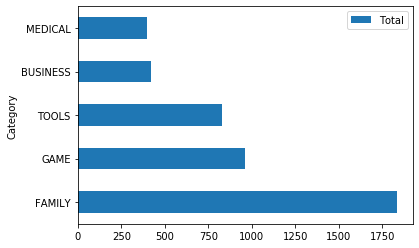

In [18]:
cat_order = df2.groupby('Category').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()

cat_order.plot.barh()

In [19]:
#cat_order['Category'].tolist() 
#y = df2['Reviews'].value.toList()
y = cat_order.iloc[0:,0:1].stack()#.values  #.drop(columns='variable')
y

y.values 

array([1832,  959,  827,  420,  395], dtype=int64)

In [20]:
x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
x = [sublist[0] for sublist in x0] 
x

['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL']

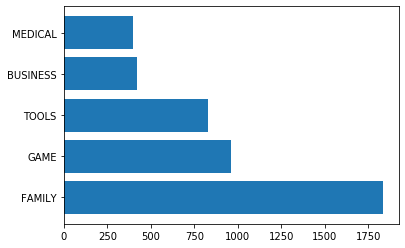

In [21]:
cat_order = df2.groupby('Category').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()
 
x = cat_order.reset_index().iloc[0:,0:1]
y = cat_order.reset_index().iloc[0:,1:]

#x1 =  np.array(cat_order.reset_index().iloc[0:,0:1].values.tolist())
#x3 = cat_order.reset_index().iloc[0:,0:1].values#.tolist() 

x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
x1 = [sublist[0] for sublist in x0] 
y1 = cat_order.iloc[0:,0:1].stack().values 
 
x2 = np.array(["FAMILY", "GAME", "TOOLS", "MEDICAL","BUSINESS"])
y2 = np.array([3, 8, 1, 10,11]) 

plt.barh(x1 , y1)
plt.show()
#scores[k].percentile 

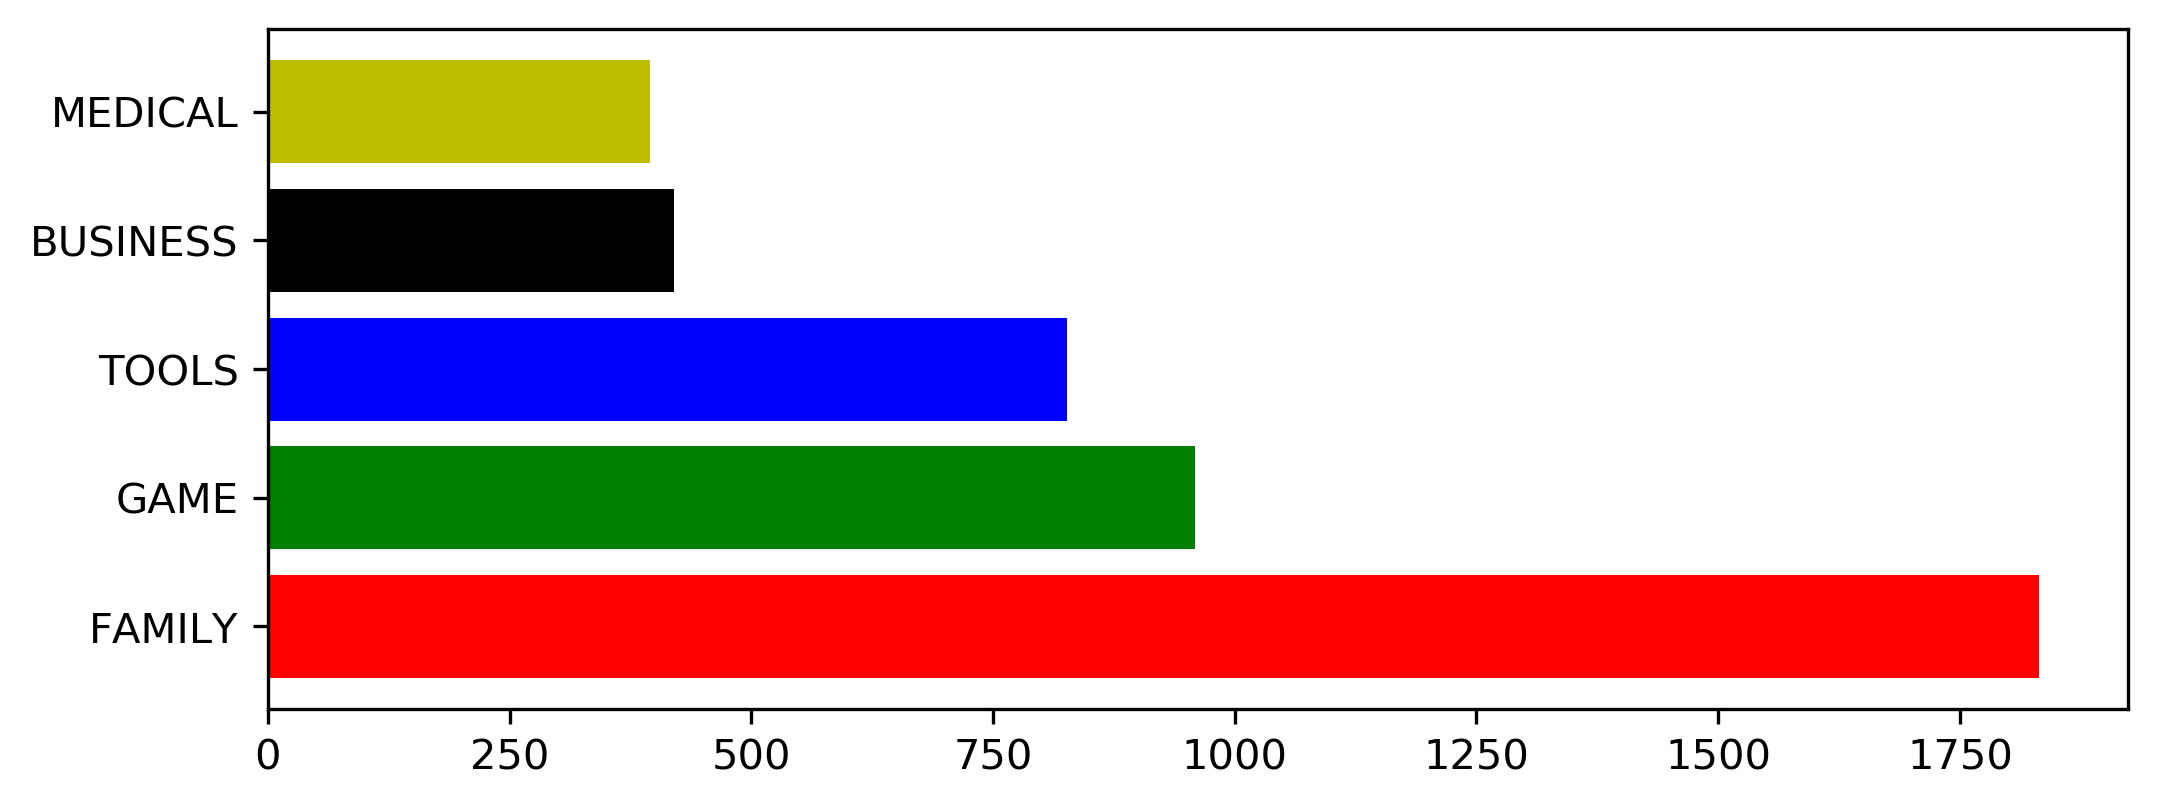

In [22]:
cat_order = df2.groupby('Category').agg({
    'Category': 'count'}).rename({'Category':'Total'}, axis=1).sort_values('Total',ascending=False).head()
cat_order
import numpy as np
 
x0 = cat_order.reset_index().iloc[0:,0:1].values.tolist() 
X = [sublist[0] for sublist in x0] 
Y = cat_order.iloc[0:,0:1].stack().values 
 
my_colors = 'rgbkymc'

fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh( X , Y , color=my_colors)
 
plt.savefig('cat_order.png',bbox_inches="tight") 

**Membuat Scatter Plot**

**_Task 8:_** Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
    

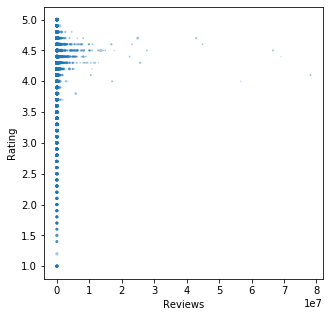

In [23]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/1800
#area = playstore[_______].values/10000000
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

**Membuat Histogram Size Distribution**

**_Task 9:_** Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes). Histogram yang terbentuk terbagi menjadi 100 bins

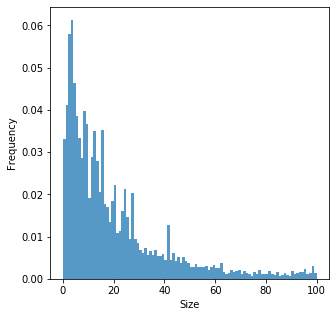

In [24]:
X=(df2['Size'] /1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X ,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

**_Task 10:_** Buatlah plot berdasarkan hasil analisis anda. Plot yang dibuat tidak diperbolehkan sama dengan plot yang sudah dicontohkan.

In [25]:
#Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Type. 
#Buatlah bar plot dimana axis x adalah nama Type dan axis y adalah jumlah aplikasi pada setiap kategori, 
#kemudian urutkan dari jumlah terbanyak

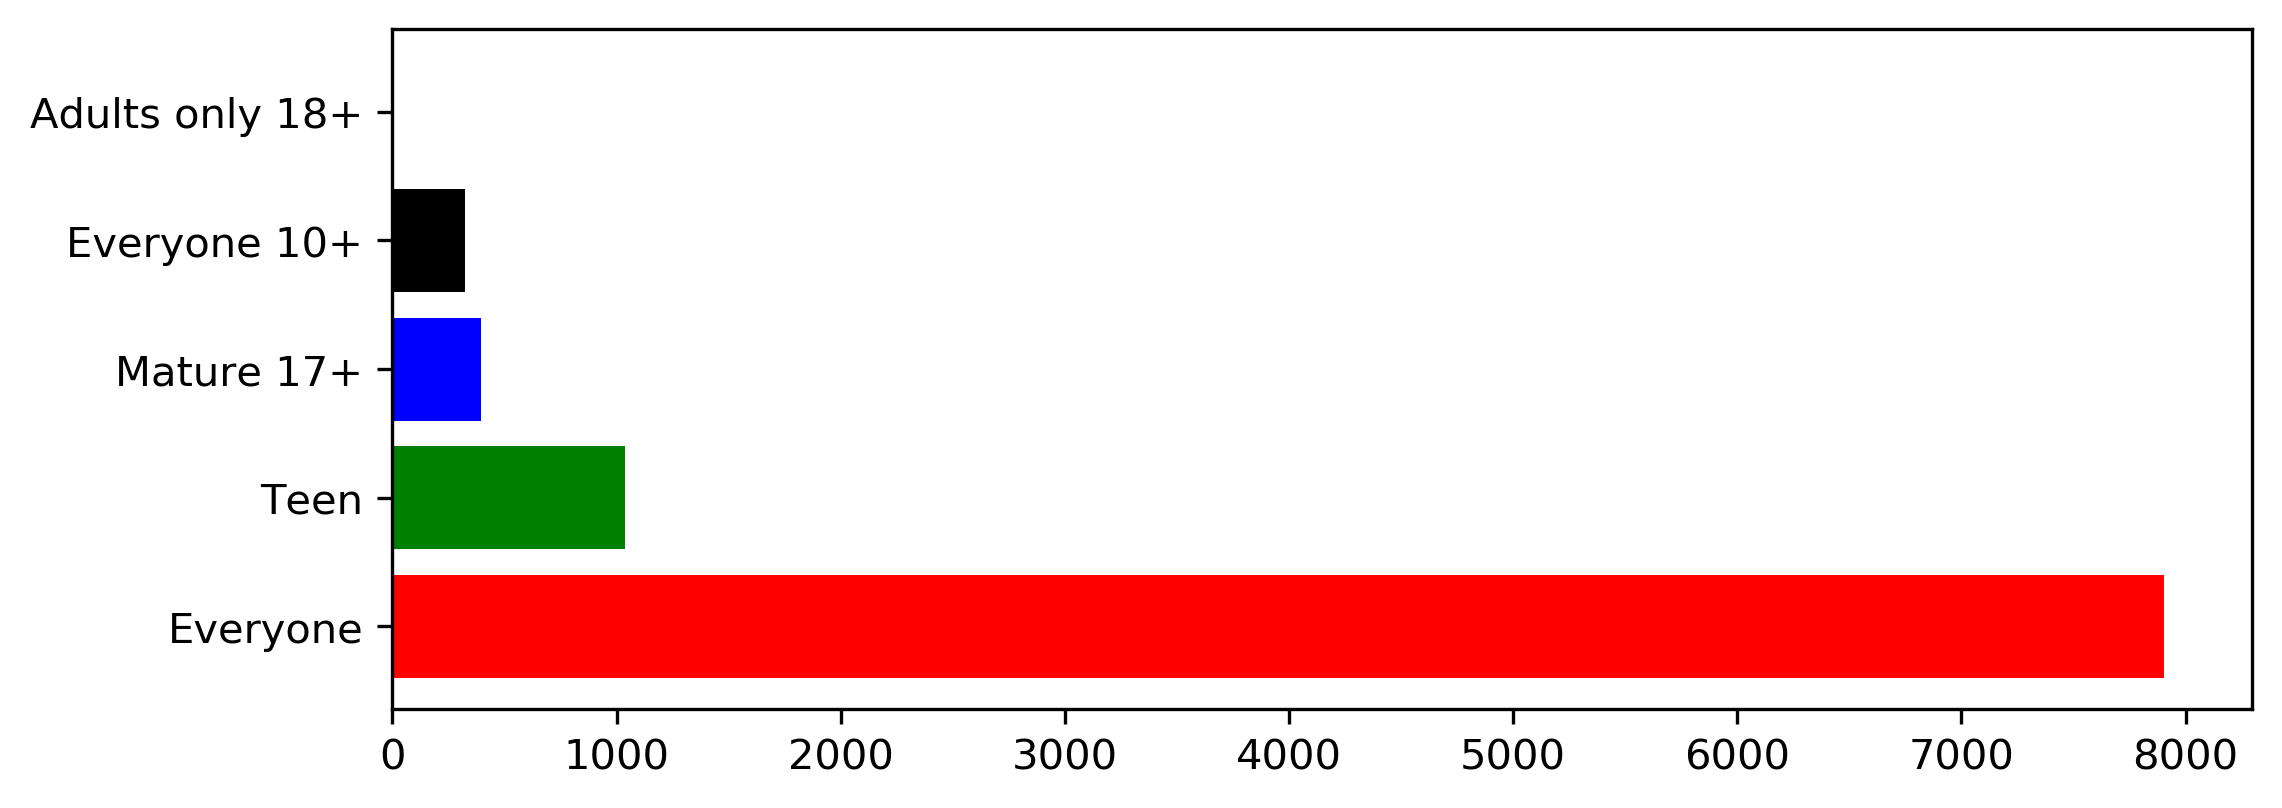

In [27]:
## code here
type_order = df2.groupby('Content Rating').agg({
    'App': 'count'}).rename({'App':'Total'}, axis=1).sort_values('Total',ascending=False).head()

#type_order.plot.barh()

import numpy as np
 
x0 = type_order.reset_index().iloc[0:,0:1].values.tolist() 
X = [sublist[0] for sublist in x0] 
Y = type_order.iloc[0:,0:1].stack().values 
 
my_colors = 'rgbkymc'

fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh( X , Y , color=my_colors)
 
plt.savefig('type_order.png',bbox_inches="tight") 
